# Section 1 - K-Means

## 1.1 Euclidean Distance

### 1.1.a 

In [10]:
import numpy as np
import matplotlib.pyplot as plt

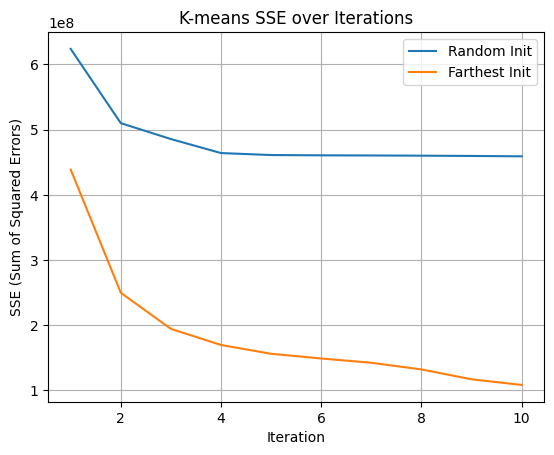

In [ ]:
f_data=open('HW4_data/data.txt','r')
f_init_farthest=open('HW4_data/init_farthest.txt','r')
f_init_random=open('HW4_data/init_random.txt','r')
data=np.array([[float(x) for x in line.split()]for line in f_data])
farthest=np.array([[float(y) for y in line.split()]for line in f_init_farthest])
random=np.array([[float(z) for z in line.split()]for line in f_init_random])

def compute_sse(data,centers,labels):
    sse=0
    for i, point in enumerate(data):
        center=centers[labels[i]]
        sse += np.sum((point - center)**2)
    return sse

def kmeans(data,init_centers,max_iter=10):
    centers=init_centers.copy()
    sse_list=[]

    for _ in range(max_iter):
        distances = np.linalg.norm(data[:, np.newaxis] - centers, axis=2)
        labels = np.argmin(distances, axis=1)

        # 計算 SSE
        sse = compute_sse(data, centers, labels)
        sse_list.append(sse)

        # 更新中心
        new_centers = np.array([
            data[labels == k].mean(axis=0) if np.any(labels == k) else centers[k]
            for k in range(len(centers))
        ])

         # 若中心不再改變就提前結束
        if np.allclose(new_centers, centers):
            break

        centers = new_centers

    return sse_list



sse_random = kmeans(data, random)
sse_farthest = kmeans(data, farthest)

plt.plot(range(1, len(sse_random)+1), sse_random, label="Random Init")
plt.plot(range(1, len(sse_farthest)+1), sse_farthest, label="Farthest Init")
plt.xlabel("Iteration")
plt.ylabel("SSE (Sum of Squared Errors)")
plt.title("K-means SSE over Iterations")
plt.legend()
plt.grid(True)
plt.show()

sse_random: 0.26398863292044183
sse_farthest: 0.7525973243724756


### 1.1.b 

In [ ]:
#random
sse_random_change=(sse_random[0]-sse_random[9])/sse_random[0]
#farthest
sse_farthest_change=(sse_farthest[0]-sse_farthest[9])/sse_farthest[0]
print("sse_random:",sse_random_change)
print("sse_farthest:",sse_farthest_change)

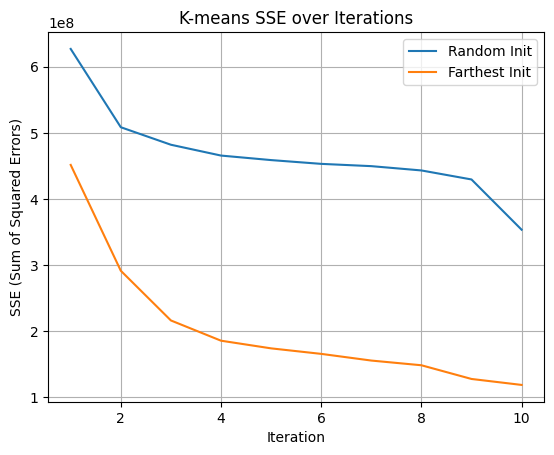

sse_random: 0.4361887445987642
sse_farthest: 0.7370975593135732


## 1.2 Manhattan Distance

### 1.2.a 

In [ ]:
f_data=open('HW4_data/data.txt','r')
f_init_farthest=open('HW4_data/init_farthest.txt','r')
f_init_random=open('HW4_data/init_random.txt','r')
data=np.array([[float(x) for x in line.split()]for line in f_data])
farthest=np.array([[float(y) for y in line.split()]for line in f_init_farthest])
random=np.array([[float(z) for z in line.split()]for line in f_init_random])

def compute_sse(data,centers,labels):
    sse=0
    for i, point in enumerate(data):
        center=centers[labels[i]]
        sse += np.sum((point - center)**2)
    return sse

def kmeans(data,init_centers,max_iter=10):
    centers=init_centers.copy()
    sse_list=[]

    for _ in range(max_iter):
        distances = np.sum(np.abs(data[:, np.newaxis] - centers), axis=2)
        labels = np.argmin(distances, axis=1)

        # 計算 SSE
        sse = compute_sse(data, centers, labels)
        sse_list.append(sse)

        # 更新中心
        new_centers = np.array([
            data[labels == k].mean(axis=0) if np.any(labels == k) else centers[k]
            for k in range(len(centers))
        ])

         # 若中心不再改變就提前結束
        if np.allclose(new_centers, centers):
            break

        centers = new_centers

    return sse_list

import matplotlib.pyplot as plt

sse_random = kmeans(data, random)
sse_farthest = kmeans(data, farthest)

plt.plot(range(1, len(sse_random)+1), sse_random, label="Random Init")
plt.plot(range(1, len(sse_farthest)+1), sse_farthest, label="Farthest Init")
plt.xlabel("Iteration")
plt.ylabel("SSE (Sum of Squared Errors)")
plt.title("K-means SSE over Iterations")
plt.legend()
plt.grid(True)
plt.show()

### 1.2.b 

In [ ]:
#random
sse_random_change=(sse_random[0]-sse_random[9])/sse_random[0]
#farthest
sse_farthest_change=(sse_farthest[0]-sse_farthest[9])/sse_farthest[0]
print("sse_random:",sse_random_change)
print("sse_farthest:",sse_farthest_change)

# Section 2 - Various Clustering Methods

## 2.1 Preprocess

In [13]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [19]:
df=pd.read_csv("HW4_data/Iris.csv")
#display(df)
X=df.drop(['Id','Species'],axis=1)
Y=df['Species']
#display(X)
#display(Y)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled=pd.DataFrame(X_scaled,columns=X.columns)

#display(X_scaled)


## 2.2 PCA Visualization

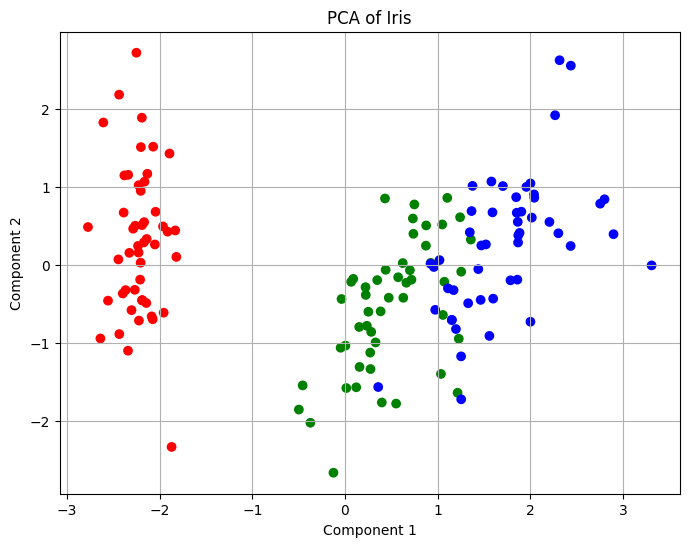

In [20]:
pca=PCA(n_components=2)
x_pca=pca.fit_transform(X_scaled)

color_dict = {'Iris-setosa': 'r', 'Iris-versicolor': 'g', 'Iris-virginica': 'b'}

colors = Y.map(color_dict)

plt.figure(figsize=[8,6])
plt.scatter(x_pca[:,0],x_pca[:,1],c=colors)
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.title("PCA of Iris")
plt.grid(True)
plt.show()

## 2.3 Other Methods

### 2.3.a 

### 2.3.b

### 2.3.c